# Projeto: Esteira de Aprendizado de Máquina
## Dataset: Extrovert vs Introvert Behavior Data (personality_dataset.csv)

# 1. Importar

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# 2. Carregamento da base de dados

In [ ]:
file_path = 'personality_dataset.csv'
df = pd.read_csv(file_path)

# 3. Estatísticas descritivas gerais
Exibe estatísticas descritivas e informações gerais do DataFrame

In [ ]:
print("\n--- Estatísticas Descritivas ---")
print(df.describe())
print("\n--- Informações Gerais ---")
print(df.info())


--- Estatísticas Descritivas ---
       Time_spent_Alone  Social_event_attendance  Going_outside  \
count       2837.000000              2838.000000    2834.000000   
mean           4.505816                 3.963354       3.000000   
std            3.479192                 2.903827       2.247327   
min            0.000000                 0.000000       0.000000   
25%            2.000000                 2.000000       1.000000   
50%            4.000000                 3.000000       3.000000   
75%            8.000000                 6.000000       5.000000   
max           11.000000                10.000000       7.000000   

       Friends_circle_size  Post_frequency  
count          2823.000000     2835.000000  
mean              6.268863        3.564727  
std               4.289693        2.926582  
min               0.000000        0.000000  
25%               3.000000        1.000000  
50%               5.000000        3.000000  
75%              10.000000        6.000000  
ma

# 4. Transformação em colunas: Normalização de colunas numéricas
Normaliza as colunas numéricas para melhorar o desempenho do modelo

In [ ]:
colunas_numericas = [
    'Time_spent_Alone',
    'Social_event_attendance',
    'Going_outside',
    'Friends_circle_size',
    'Post_frequency'
]
scaler = StandardScaler()
df[colunas_numericas] = scaler.fit_transform(df[colunas_numericas])

# Transformação das colunas categóricas em numéricas
Converte colunas categóricas ('Stage_fear', 'Drained_after_socializing') para valores numéricos

In [ ]:
for col in ['Stage_fear', 'Drained_after_socializing']:
    le_col = LabelEncoder()
    df[col] = le_col.fit_transform(df[col].astype(str))

# 5. Transformação em linhas: remoção de duplicatas
Remove linhas duplicadas do DataFrame

In [ ]:
df = df.drop_duplicates()

# 6. Criação de subconjuntos (treinamento, validação, teste)
Separa os dados em conjuntos de treino, validação e teste

In [ ]:
X = df.drop('Personality', axis=1)
y = df['Personality']
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 7. Treinamento e avaliação do modelo
Treina o modelo RandomForest e faz predições no conjunto de validação

In [ ]:
# Split dos dados
X = df.drop('Personality', axis=1)
y = df['Personality']
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Treinamento e avaliação
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)
y_val_pred = modelo.predict(X_val)  # <-- ESSA LINHA É OBRIGATÓRIA


# 8. Matriz de confusão e acurácia
Exibe a matriz de confusão e a acurácia do modelo na validação.
E matriz de confusão e acurácia.


Acurácia na validação: 91.78%


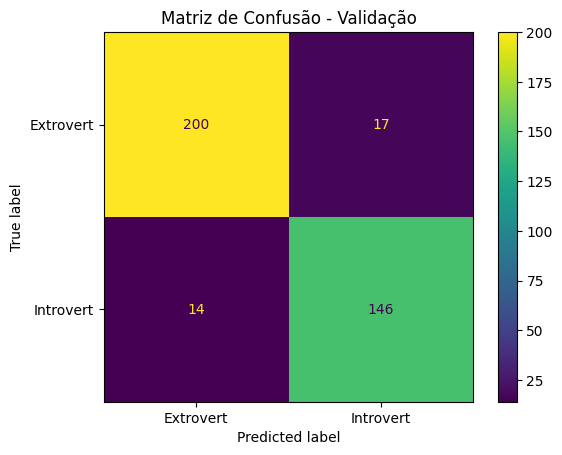

In [47]:
acc = accuracy_score(y_val, y_val_pred)
print(f"\nAcurácia na validação: {acc*100:.2f}%")
matriz = confusion_matrix(y_val, y_val_pred)
ConfusionMatrixDisplay(matriz, display_labels=le.classes_).plot()
plt.title("Matriz de Confusão - Validação")
plt.show()

# 9. Predição com o modelo implantado (exemplo)
Mostra um exemplo de predição do modelo usando o conjunto de teste

In [46]:
y_test_pred = modelo.predict(X_test)
print("\n--- Exemplo de Predição ---")
print("Amostra do conjunto de teste:")
print(X_test.iloc[0])
print(f"Classe verdadeira: {le.inverse_transform([y_test[0]])[0]}")
print(f"Classe predita: {le.inverse_transform([y_test_pred[0]])[0]}")


--- Exemplo de Predição ---
Amostra do conjunto de teste:
Time_spent_Alone            -1.007830
Stage_fear                   0.000000
Social_event_attendance      0.701490
Going_outside                1.780207
Drained_after_socializing    0.000000
Friends_circle_size          0.403629
Post_frequency                    NaN
Name: 351, dtype: float64
Classe verdadeira: Extrovert
Classe predita: Extrovert
